In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
from plotly.offline import iplot,init_notebook_mode
import plotly.graph_objs as go
import plotly.io as pio

In [5]:
df =pd.read_csv("customers.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.shape

(200, 5)

In [8]:
df.isnull()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [12]:
df.std()

C:\Users\Abhishek Mishra\AppData\Local\Temp\ipykernel_4176\3390915376.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.889296
dtype: float64

In [13]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

In [14]:
def graph_histo(x):
    if x.dtype == "int64" or x.dtype == "float64":
        # Select size of bins by getting maximum and minimum and divide the substraction by 10
        size_bins = 10
        title = x.name
        color_kde = list(map(float, np.random.rand(3,)))
        color_bar = list(map(float, np.random.rand(3,)))

        # Plot the displot
        sns.distplot(x, bins=size_bins, kde_kws={"lw": 1.5, "alpha":0.7, "color":color_kde},
                       hist_kws={"linewidth": 1.5, "edgecolor": "blue",
                                "alpha": 0.3, "color":color_bar})
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.ylabel("Frequency", size=15, labelpad=12);
        plt.title(title, size=18)
        # Customize grid and axes visibility
        plt.grid(False);
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);   
    else:
        x = pd.DataFrame(x)
        # Plot       
        sns.catplot(x=x.columns[0], kind="count", palette="spring", data=x)
        # Customize title
        title = x.columns[0]
        plt.title(title, size=18)
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.xlabel("")
        plt.ylabel("Counts", size=16, labelpad=15);        
        # Customize grid and axes visibility
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);

In [15]:
spending = df["Spending Score (1-100)"]

In [16]:
statistics(spending)


,Mean,Standard Deviation,Median,Variance
Variable,,,,
Spending Score (1-100),49.825,25.824492,50.0,666.904375


C:\Users\Abhishek Mishra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



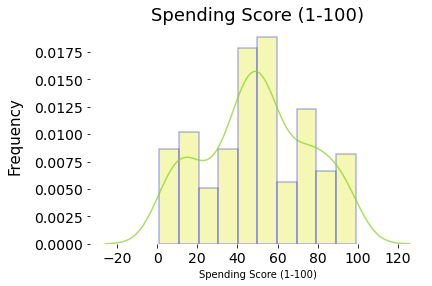

In [18]:
graph_histo(spending)

In [19]:
age = df["Age"]


In [20]:
statistics(age)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Age,38.85,13.934041,36.0,194.1575


C:\Users\Abhishek Mishra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



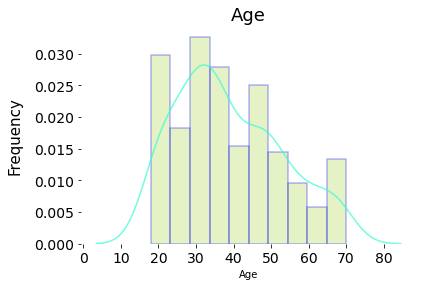

In [21]:
graph_histo(age)

In [22]:
income = df["Annual Income (k$)"]

In [23]:
statistics(income)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Annual Income (k$),60.56,26.198977,61.5,686.3864


C:\Users\Abhishek Mishra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



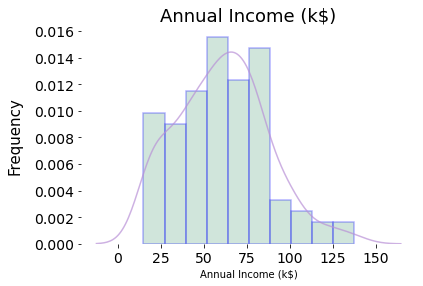

In [24]:
graph_histo(income)

In [25]:
gender = df["Gender"]

In [26]:
statistics(gender)

,Gender
Female,112
Male,88


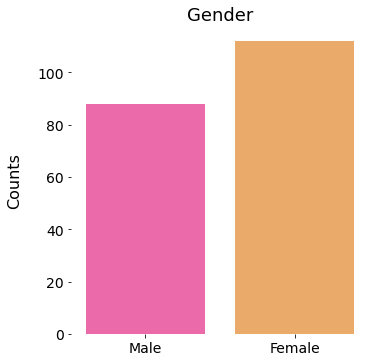

In [27]:
graph_histo(gender)

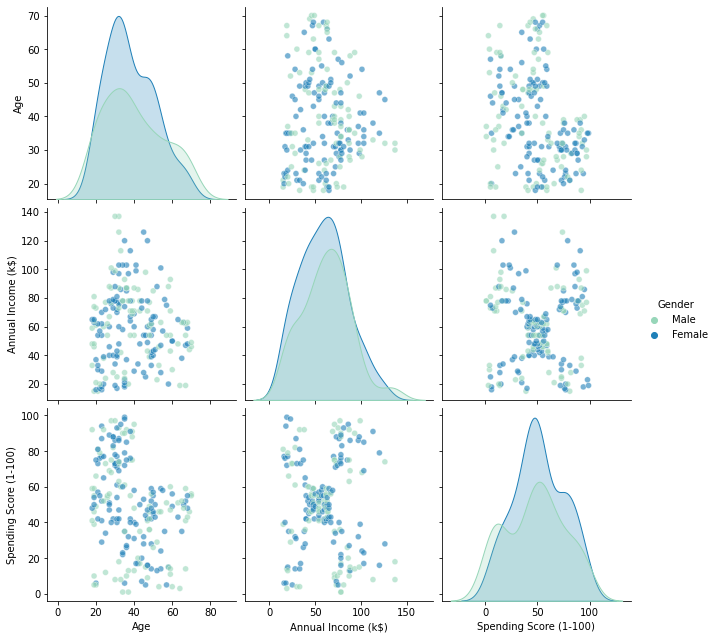

In [28]:
sns.pairplot(df, x_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               y_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               hue = "Gender", 
               kind= "scatter",
               palette = "YlGnBu",
               height = 3,
               plot_kws={"s": 35, "alpha": 0.6});

In [30]:
df["Male"] = df.Gender.apply(lambda x: 0 if x == "Male" else 1)

In [31]:
df["Male"] = df.Gender.apply(lambda x: 0 if x == "Male" else 1)

In [32]:
X = df.iloc[:, 2:]

In [33]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100),Male
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [34]:
# Apply PCA and fit the features selected
pca = PCA(n_components=2).fit(X)

In [35]:
print(pca.components_)

[[ 1.58709947e-01  6.49390049e-01 -7.43707341e-01 -1.76280485e-03]
 [-1.58626479e-01  7.60242031e-01  6.29975927e-01  1.63612438e-04]]


In [36]:
print(pca.explained_variance_)

[714.02704069 672.47756779]


In [37]:
pca_2d = pca.transform(X)

C:\Users\Abhishek Mishra\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



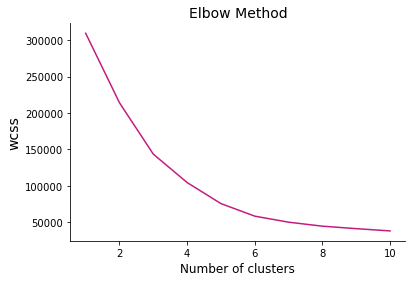

In [52]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=250, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show() 

In [54]:
# Kmeans algorithm
# n_clusters: Number of clusters. In our case 5
# init: k-means++. Smart initialization
# max_iter: Maximum number of iterations of the k-means algorithm for a single run
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state: Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

# Fit and predict 
y_means = kmeans.fit_predict(X)

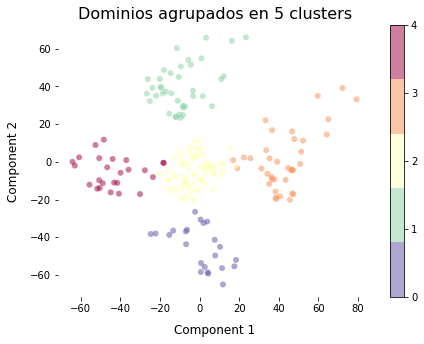

In [56]:
fig, ax = plt.subplots(figsize = (7, 5))

plt.scatter(pca_2d[:, 0], pca_2d[:, 1],
            c=y_means, 
            edgecolor="none", 
            cmap=plt.cm.get_cmap("Spectral_r", 5),
            alpha=0.5)
        
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xticks(size=10)
plt.yticks(size=10)

plt.xlabel("Component 1", size = 12, labelpad=10)
plt.ylabel("Component 2", size = 12, labelpad=10)

plt.title('Dominios agrupados en 5 clusters', size=16)


plt.colorbar(ticks=[0, 1, 2, 3, 4]);

plt.show()

In [57]:
kmean= KMeans( n_clusters=6,  n_init=15, max_iter=15 , random_state=44)
kmean.fit(X)
labels=kmean.labels_

In [58]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,x,y,label,cluster
0,-1.475709,1.010488,1,1
1,-1.837772,2.614659,4,4
2,1.420867,0.395488,1,1
3,-1.798023,2.350246,4,4
4,-1.031704,0.846414,1,1


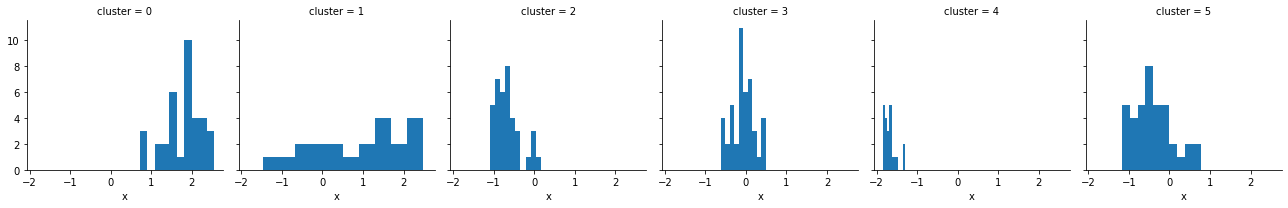

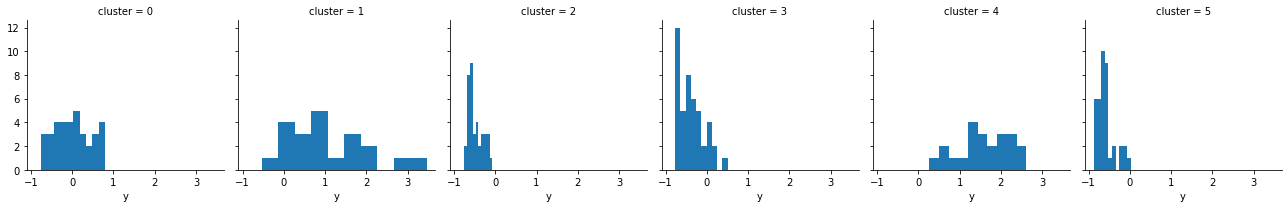

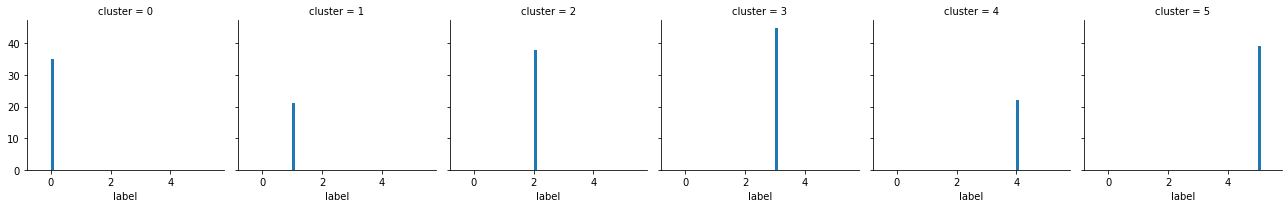

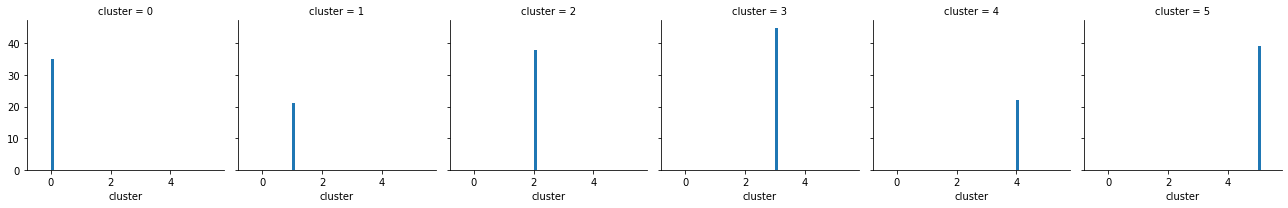

In [59]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [60]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(200, 2)

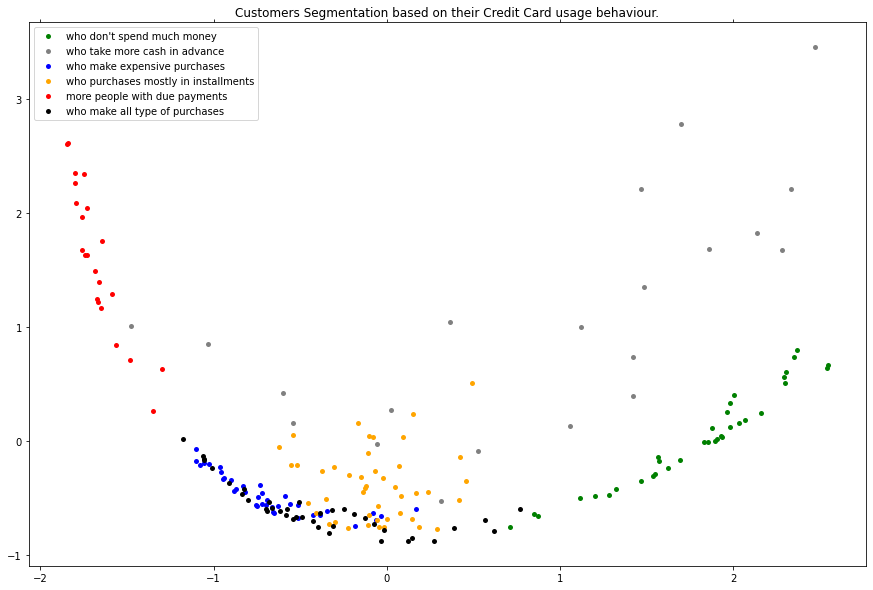

In [62]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {5: 'black',
          4: 'red',
          3: 'orange', 
          2: 'blue', 
          1: 'grey',  
          0:'green'}

names = {5: 'who make all type of purchases', 
         4: 'more people with due payments', 
         3: 'who purchases mostly in installments', 
         2: 'who make expensive purchases',
         1: 'who take more cash in advance',
         0:'who don\'t spend much money'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage behaviour.")
plt.show()

In [63]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ["Age", "Spending", "Male", "Female"])

In [64]:
centroids.index_name = "ClusterID"

In [65]:
centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)

In [66]:
centroids

,Age,Spending,Male,Female,ClusterID
0,45.217391,26.304348,20.913043,0.608696,0
1,32.763158,85.210526,82.105263,0.552632,1
2,43.727273,55.480519,49.324675,0.597403,2
3,40.378378,89.081081,17.324324,0.459459,3
4,24.960000,28.040000,77.000000,0.560000,4


In [67]:
X_new = np.array([[43.727273,49.324675,0.597403,2]]) 
 
new_customer = kmeans.predict(X_new)
print(f"The new customer belongs to segment {new_customer[0]}")

The new customer belongs to segment 0


C:\Users\Abhishek Mishra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

